# Исследование потенциально популярного продукта для компании из gamedev индустрии

В нашем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы за 2016 год.  
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные содержатся в файле:
`/datasets/games.csv`

**Описание данных**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Настоящее исследование преследует две цели:  
1. Составить портрет пользователя каждого региона


2. Проверить две гипотезы:  
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


## Исследование данных

Начнем с импорта необходимых библиотек, которые нам понадобятся при проведении нашего исследования

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

Импортируем предоставленный файл games.csv и сохраним его в переменной df:

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

Изучим общую информацию по предоставленным данным - размер датафрейма, типы данных и количество пропусков в данных:

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обратимся к функции `.info()` для просмотра информации о предоставленной базе данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим долю пропущенных значений в датафрейме

In [5]:
df.isnull().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

### Промежуточный вывод

Изучив основные сведения о предоставленных данных, можно выделить следующие моменты:
- Нужно привести в порядок регистр называния столбцов
- Необходимо исправить типы данных в столбцe `user_score`
- Разобраться с пропущенными значенями в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.

## Предобработка данных

Приведем названия столбцов к общему виду, сделаем их все в змеином регистре:

In [6]:
df= df.rename(columns=str.lower)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Заполнение пропусков

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на пропущенные значения в столбце `name`

In [8]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 игры, выпущенные в 1993 году и  у них нет данных об оценках и рейтинга. 
В нашей выборке в 16715 строк удаление 2-х строк ни на что не повлияет, поэтому удалим их.

In [9]:
df.drop([659, 14244], axis = 0, inplace = True)
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Проверим на количество пропусков в столбце `year_of_release`:

In [10]:
df['year_of_release'].isna().mean()

0.016095255190570215

Многовато конечно, можно было бы поискать связь между годами выпуска игр на разных платформах, однако это будет не совсем корректно, поскольку множество игр локализованы лишь на одной платформе, а на другой выходят лишь спустя годы. 
Наше исследование основано в первую очередь на дате выпуска игры и значения без данных нам никак не помогут, удалим их.

In [11]:
 df.dropna(subset=['year_of_release'], inplace=True)

In [12]:
df['year_of_release'].isna().mean()

0.0

Пропуски в столбце `critic_score` на значение -1 для удобства будущего исследования по следующим причинам:  
Во-первых можно было бы соотнести оценки критиков по одной и той же игре на разных платформах, но это было бы не совсем корректно, ведь на одной платформе игра может быть локализована хорошо, на другой нет, поэтому информация будет недостоверной.  
Во-вторых оценки в разных регионах могут быть разными. 

In [13]:
df['critic_score'] = df['critic_score'].fillna(-1)

В столбце `user_score` есть значение **tbd**, что дословно означает to be described, т.е. **будет уточнено**. В нашей ситуации это пропуск, поэтому заменим значение на привычный NaN. Удалять эти строки не будем, в будущем исследовании пригодятся. К тому же заменим пропуски на маркеры -1, для удобства будущего исслледования 

In [14]:
print(df['user_score'].value_counts())
print(df['user_score'].isna().sum())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
0.7       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64
6605


In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [16]:
#Проверка
print(df['user_score'].value_counts())
print(df['user_score'].isna().sum())

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1        2
0.7      2
0.3      2
9.7      1
0        1
Name: user_score, Length: 95, dtype: int64
8981


In [17]:
df['user_score'] = df['user_score'].fillna(-1)

Проверим пропуски в столбце `rating`:

In [18]:
df['rating'].isna().sum()

6676

In [19]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

6764 пропуска - это много, но видим, что обозначения рейтингов различаются, приведем все значения к общему виду и предположим, что пропуски в рейтинге - это RP, то есть, игра еще не получила свой рейтинг в ESRB.

Согласно данным Entertainment Software Rating Board (ESRB), в мире компьютерных игр существует следующий возрастной рейтинг:  
- **EC** Для детей младшего возраста
- **E** Для всех, первоначально назывался **K-A**
- **E10+** Для всех от 10 лет и старше
- **T** Подросткам
- **M** Для взрослых
- **AO** Только для взрослых
- **RP** Рейтинг ожидается

In [20]:
df['rating'] = df['rating'].replace('K-A','E')

In [21]:
df['rating'] = df['rating'].fillna('RP')

In [22]:
df['rating'].isna().sum()

0

In [23]:
df['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

### Работа с типами данных

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Поменяем тип данных в столбце `user_score` на числовой:

In [25]:
df['user_score'] = df['user_score'].astype(float)

### Работа с дубликатами

Обратимся к функции duplicated, чтобы определить количество явных дубликатов в нашем датафрейме:

In [26]:
df.duplicated().sum()

0

Явных дубликатов нет.

### Проверка на аномалии  и выбросы

Посмотрим много ли в нашем датафрейме аномалий и вбросов:

In [27]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,2.688081
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,4.170124
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


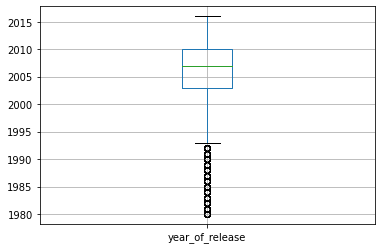

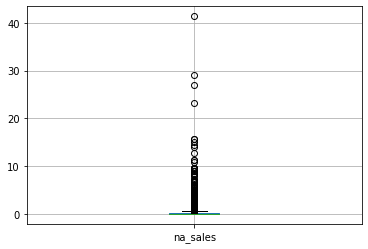

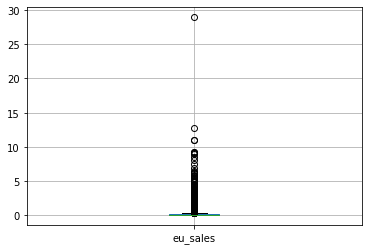

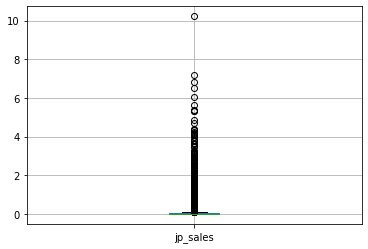

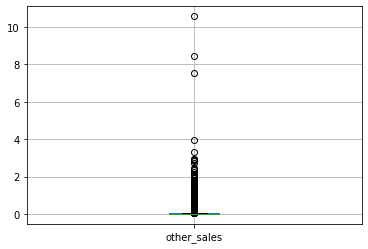

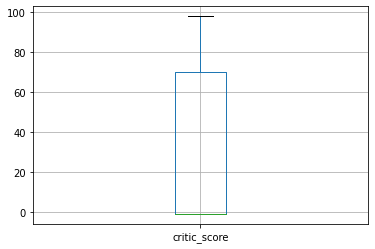

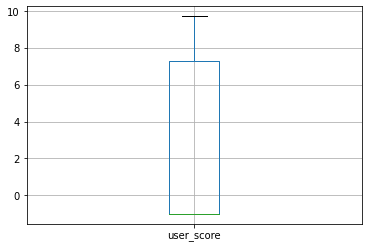

In [28]:
for column in ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']:
    plt.figure()
    df.boxplot([column])
    

Критических выбросов не видно, можно продолжать исследование.

## Работа с данными

В нашем исследовании нам пригодится сумма продаж по всем регионам, добавим этот столбец в наш датафрейм:

In [29]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] +df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,RP,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,RP,28.31


## Исследовательский анализ данных

### Исследование самых популярных платформ для игр

Проведем исследовательский анализ и посчитаем количество игр, выпущеных за разные годы:

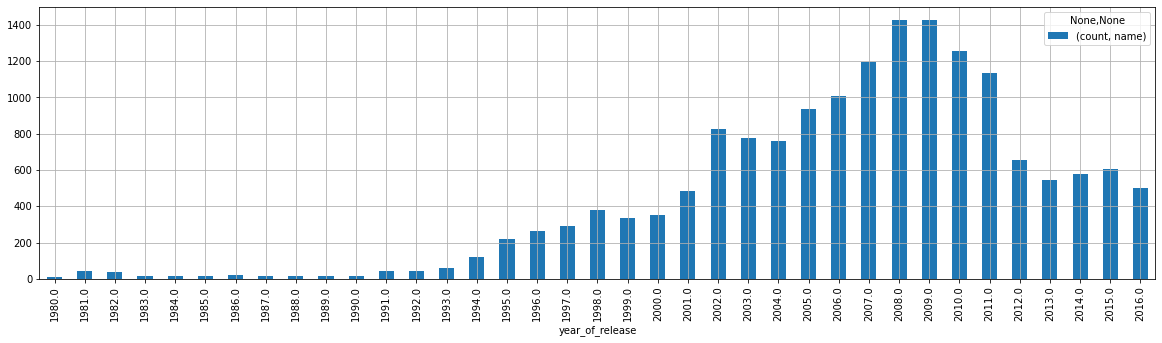

In [30]:
df.pivot_table(
    index = ['year_of_release'],
    values='name',
    aggfunc=['count'])\
    .plot(kind='bar', grid=True, figsize=(20,5));


Как видно из графика, пик выпуска игр приходится на 2007-2008 годы, потом идет спад. 

Посмотрим как с годами менялись продажи игр на разных платформах

In [31]:
df_top = df.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False)#\
    #.reset_index(level=0)
df_top.columns=['sum_sales']
df_top

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Итак рейтинг по продажам игр по каждой консоли за все времена, и на первом месте у нас PS2. 
Посмотрим как обстояли дела с продажами ежегодно у каждой из консолей. При этом не будем учитывать консоли, у которых суммарные продажи за все время менее 80млн копий.
80 млн выбрал исходя из того, что WiiU по сей день является популярной консолью, ее нельзя исключать.

In [32]:
df_total = df.merge(df_top, on=['platform'], how='outer')
df_total = df_total[df_total['sum_sales'] > 80]

In [33]:
df_total['sum_sales'].unique()

array([ 891.18,  251.05,  254.43,  802.78,  961.24,  931.34, 1233.56,
        200.04,  312.88,  314.14,  257.81,  218.01,  727.58,  251.57,
        255.76,   86.48,  289.53,  159.32,   82.19,  196.73])

<AxesSubplot:xlabel='year_of_release'>

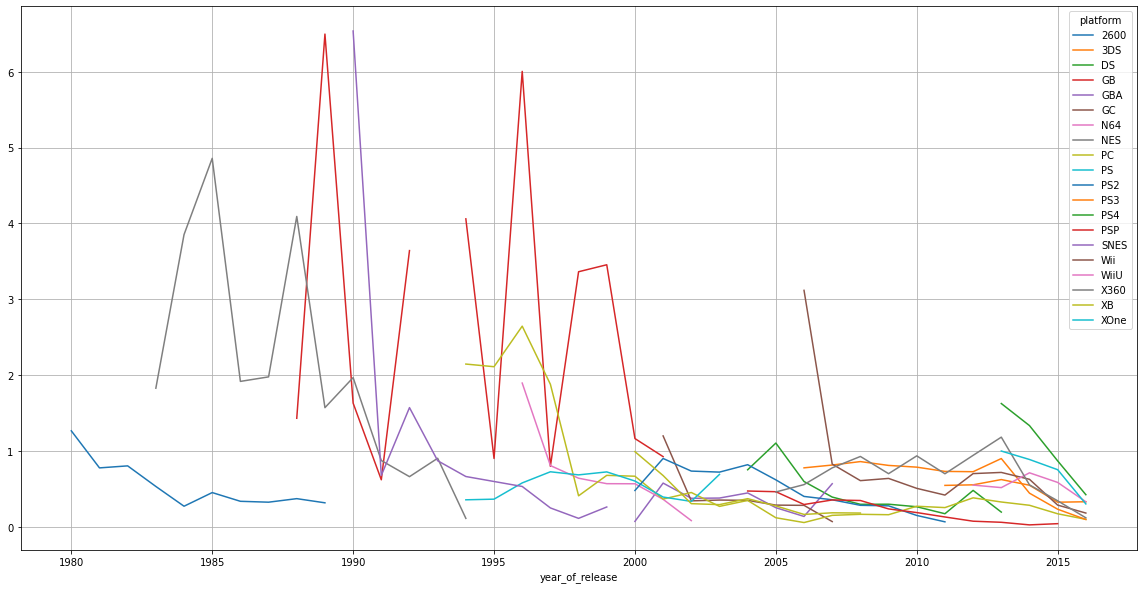

In [34]:
df_total.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales')\
    .plot(grid=True, figsize=(20,10))

У нас в датафрейме очень много различных консолей, поэтому на таком графике все кажется немного запутанным. 
Будет лучше сократить интервал исследования, тем более что из нашего графика видно, что игры на некоторых консолях уже не выпускаются.  
К тому же, в сфере компьютерных игр лучше проводить такое исследование за короткий промежуток времени, поскольку тенденции компьютерных игр очень быстро меняются и делать прогнозы по данным, которым больше даже 5 лет - не совсем корректно.

In [35]:
df_total = df_total[df_total['year_of_release'] > 2013]

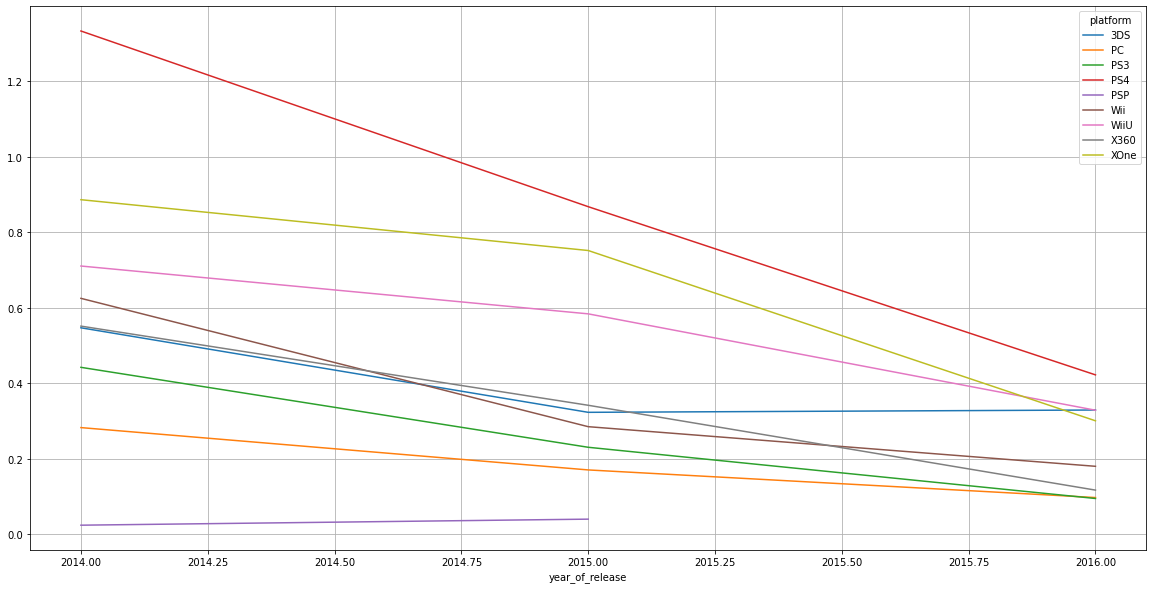

In [36]:
df_total.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales')\
    .plot(grid=True, figsize=(20,10));

Вот теперь стало нагляднее. 
В нашей выборке сейчас игры за 2013-2016 года на тех консолях, суммы продаж на которых за все время более 80млн копий. 
Из этого графика видно, что игры на PS2, Nintendo DS и PSP перестали выпускать, а самыми популярными консолями сегодня являются PS4, XboxOne и Nintendo WiiU и Nintendo 3DS. Классический расклад, сформированный годами конкурирования трех компаний, на самом деле.   
Полкольку целью этого исследования является планирование продаж и рекламных компаний на 2017 год, то рассмотрим отдельно эти четыре самые популярные консоли.  
Отдельно стоит отметить, что у 3DS у единственной виден подъем по количеству продаж из всех консолей.

In [37]:
df_consoles = df_total.query('(platform == "PS4") or (platform == "XOne") or (platform == "WiiU") or (platform == "3DS") and (year_of_release > 2013) ')
df_consoles.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sum_sales
9317,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,14.63,314.14
9318,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,314.14
9319,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,314.14
9320,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,RP,7.98,314.14
9321,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,314.14
9322,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,314.14
9323,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17,314.14
9324,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08,314.14
9325,Destiny,PS4,2014.0,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64,314.14
9326,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39,314.14


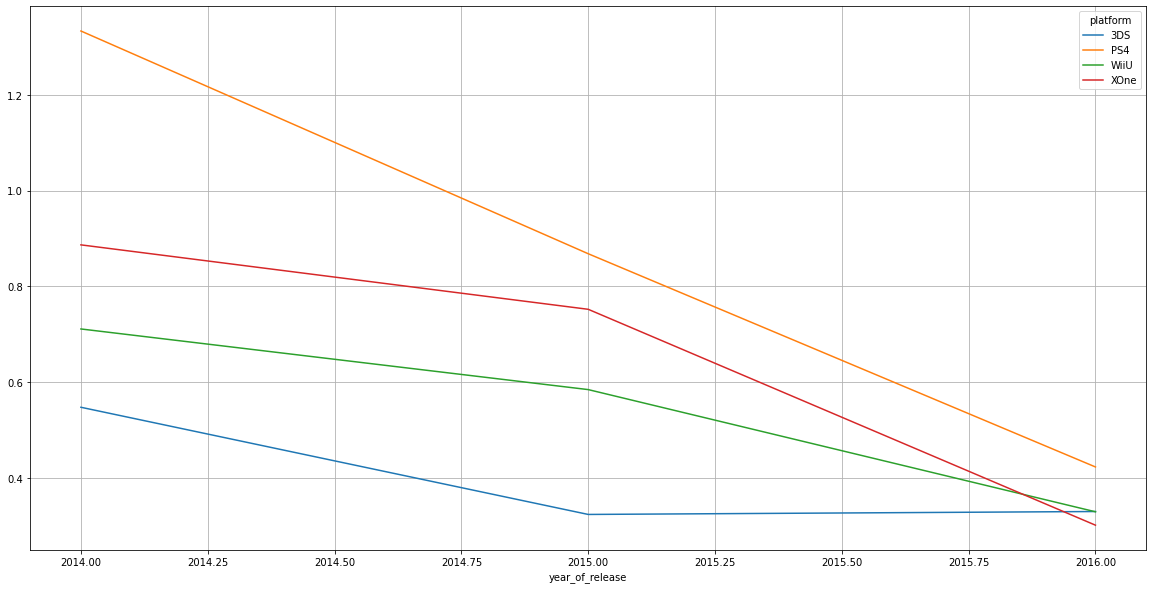

In [38]:
df_consoles.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales')\
    .plot(grid=True, figsize=(20,10));

Посмотрим на данные по продажем игр за все время по выбранным нами 4-м платформам.

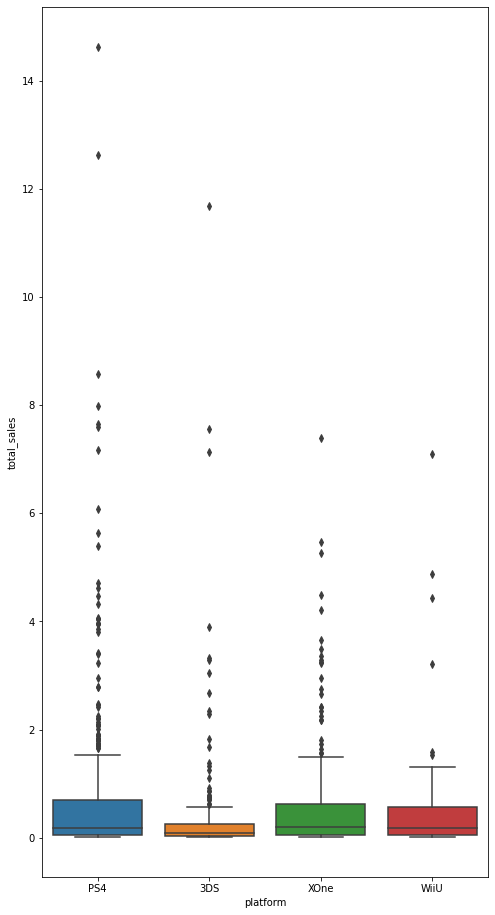

In [39]:
fig = plt.figure(figsize=(8, 16))
fig = sns.boxplot(x="platform", y="total_sales", data=df_consoles)

По нашим диаграммам размаха видно, что показатели продаж игр у 3-х консолей примерно одинаковые, а у 3DS немного меньше, уберем образовавшиеся выбросы, чтобы немного смасштабировать этот график

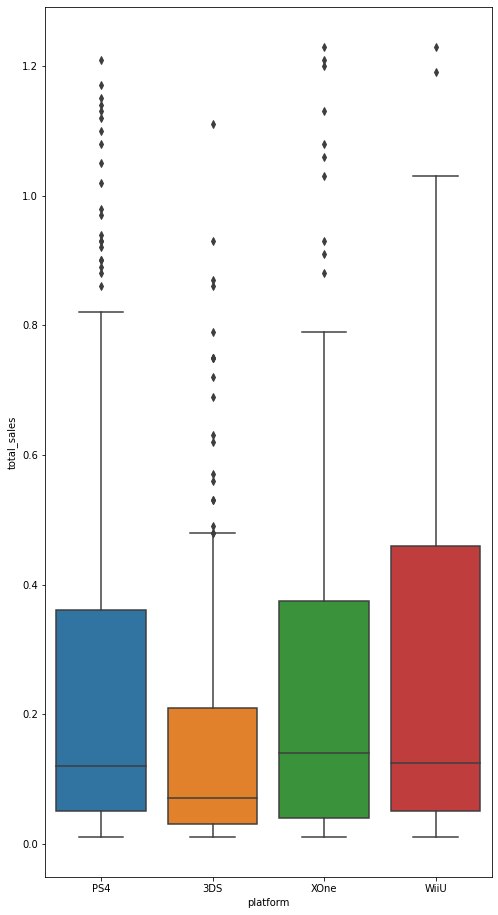

In [40]:
df_consoles = df_consoles[df_consoles['total_sales'] < 1.25]
fig = plt.figure(figsize=(8, 16))
fig = sns.boxplot(x="platform", y="total_sales", data=df_consoles)

Наше предположение оказалось верным, в среднем игры на PS4, Xbox One и WiiU продаются по 0.1-0.2 млн копий, при этом у японской WiiU этот показатель выше чем у консолей нового поколения, скорее всего это связано с тем, что консоль появилась на рынке раньше остальных, ведь она относится к консолям предыдущего поколоения.   
Nintendo 3DS единственная портативная консоль в этом списке, у нее продажи немного меньше чем у остальных, но и публика, скорее всего, иная. 

### Зависимость продаж от оценок критиков  и пользователей

Посмотрим, как влияют на продажи отзывы пользователей и критиков. 

In [41]:
df_consoles

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sum_sales
9385,WWE 2K16,PS4,2015.0,Sports,0.41,0.60,0.00,0.20,73.0,7.4,T,1.21,314.14
9386,Mad Max (2015),PS4,2015.0,Action,0.36,0.59,0.04,0.18,-1.0,-1.0,RP,1.17,314.14
9387,WWE 2K15,PS4,2014.0,Sports,0.39,0.57,0.00,0.19,62.0,5.1,T,1.15,314.14
9388,Naruto Shippuden: Ultimate Ninja Storm 4,PS4,2016.0,Fighting,0.41,0.45,0.11,0.17,79.0,8.2,T,1.14,314.14
9389,Watch Dogs 2,PS4,2016.0,Action,0.37,0.58,0.00,0.18,83.0,7.8,M,1.13,314.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15185,Dragon Quest X: All in One Package,WiiU,2015.0,Role-Playing,0.00,0.00,0.01,0.00,-1.0,-1.0,RP,0.01,82.19
15186,Legend of Kay Anniversary,WiiU,2015.0,Action,0.00,0.01,0.00,0.00,67.0,7.1,E10+,0.01,82.19
15187,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,0.00,0.00,0.01,0.00,70.0,7.4,E,0.01,82.19
15188,Art Academy: Home Studio,WiiU,2015.0,Misc,0.00,0.00,0.01,0.00,82.0,8.3,E,0.01,82.19


              total_sales  critic_score  user_score
total_sales      1.000000      0.396238    0.329630
critic_score     0.396238      1.000000    0.729498
user_score       0.329630      0.729498    1.000000


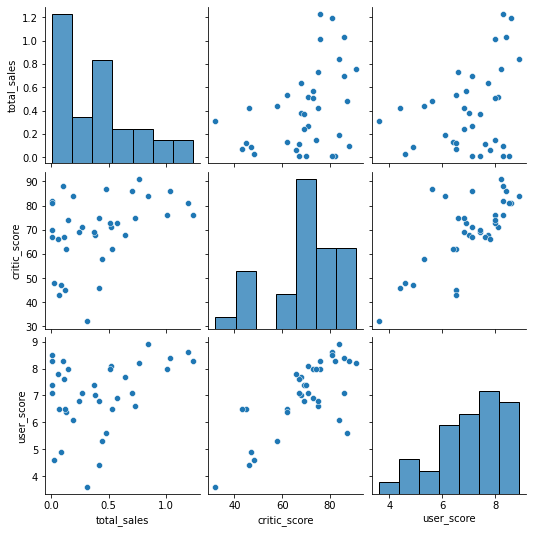

In [42]:
df_wii = df_consoles[['platform', 'total_sales', 'critic_score', 'user_score']]
df_wii = df_wii.query('(platform == "WiiU") and (critic_score > 0) and (user_score >0)')
print(df_wii.corr())
sns.pairplot(df_wii);

              total_sales  critic_score  user_score
total_sales      1.000000      0.314392    0.039124
critic_score     0.314392      1.000000    0.623880
user_score       0.039124      0.623880    1.000000


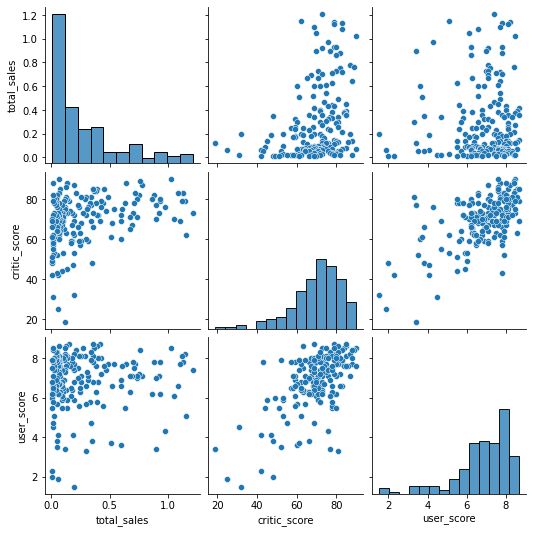

In [43]:
df_ps4 = df_consoles[['platform', 'total_sales', 'critic_score', 'user_score']]
df_ps4 = df_ps4.query('platform == "PS4"  and (critic_score > 0) and (user_score >0)')
print(df_ps4.corr())
sns.pairplot(df_ps4);

              total_sales  critic_score  user_score
total_sales      1.000000      0.386789   -0.075217
critic_score     0.386789      1.000000    0.497484
user_score      -0.075217      0.497484    1.000000


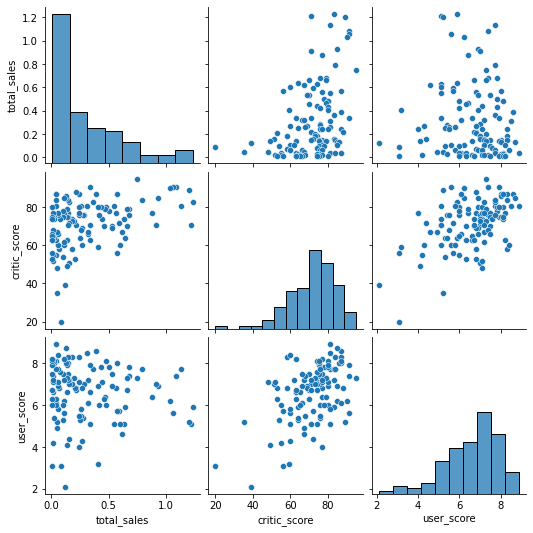

In [44]:
df_xbox = df_consoles[['platform', 'total_sales', 'critic_score', 'user_score']]
df_xbox = df_xbox.query('platform == "XOne"  and (critic_score > 0) and (user_score >0)')
print(df_xbox.corr())
sns.pairplot(df_xbox);

              total_sales  critic_score  user_score
total_sales      1.000000      0.308053    0.279048
critic_score     0.308053      1.000000    0.866908
user_score       0.279048      0.866908    1.000000


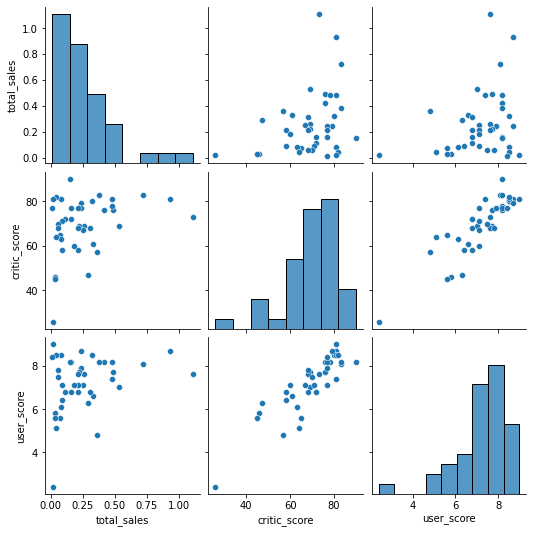

In [45]:
df_xbox = df_consoles[['platform', 'total_sales', 'critic_score', 'user_score']]
df_xbox = df_xbox.query('platform == "3DS"  and (critic_score > 0) and (user_score >0)')
print(df_xbox.corr())
sns.pairplot(df_xbox);

По посчитанным коэффициентам корреляции и диаграммам рассеивания можно сделать следующие выводы:
- Глобально, количество продаж больше при более высоких оценках критиков и пользователей на всех 4-х платформах
- Однако у Xbox One у игр при большом количестве продаж оценки пользователей меньше. 

### Исследование игр по жанрам

Посмотрим, какие жанры игр самые популярные и лучше всех продаются.  
За все время, на всех платформах:

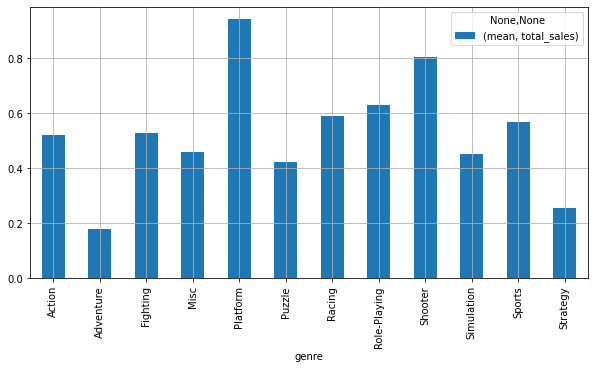

In [46]:
df.pivot_table(index='genre', 
               values='total_sales', 
               aggfunc=['mean'])\
    .plot(grid=True, figsize=(10,5), kind='bar');

За 2013-2016 года:

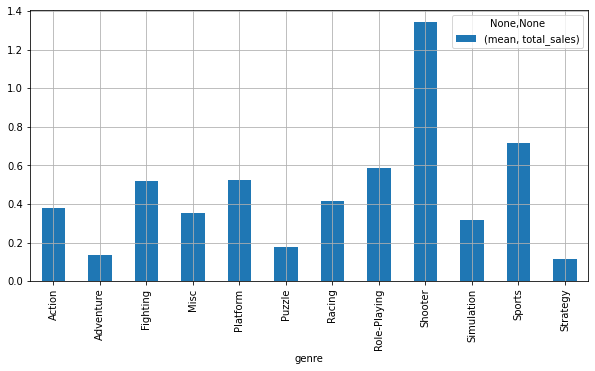

In [47]:
df_total.pivot_table(index='genre', 
                        values='total_sales', 
                        aggfunc=['mean'])\
    .plot(grid=True, figsize=(10,5), kind='bar');

За период 2013-2016 самыми популярными жанрами игр являются шутеры, спортивные и файтинги, игры с самыми маленькими продажами - это приключения и стратегии.  

А вот по данным всех консолей, самые популярные жанры игр - это платформеры, шутеры и рпг, самыми непопулярными, как и срезе 2013-2016 года являются приключенческие игры и стратегии. 

В сравнении двух выборок можно придти к выводу, что на всех консолях одним из самых популярных, и соответственно самым продаваемым жанром являются шутеры. 

## Портрет пользователя каждого региона

Составим портрет пользователя для каждого из регионов и посмотрим, как отличаются по популярности платформы и жанры.

Построим общий график зависимости продаж игр по платформам в регионах.

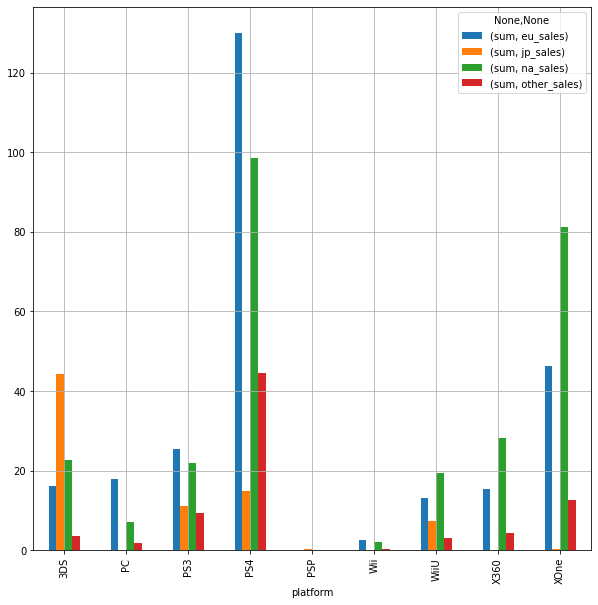

In [48]:
df_region = df_total.pivot_table(
    index='platform', 
    values=['na_sales','eu_sales', 'jp_sales', 'other_sales'],
    aggfunc=['sum'])
df_region.plot(grid=True, figsize=(10,10), kind='bar');

Но для нагрядности сделаем круговые диаграммы по каждому региона с ТОП-5 самых продаваемых игр по консолям:

In [49]:
print(df_region)
df_region.columns=['EU','JP', 'NA', 'Other']
print(df_region)

              sum                              
         eu_sales jp_sales na_sales other_sales
platform                                       
3DS         16.12    44.24    22.64        3.68
PC          17.97     0.00     7.23        1.85
PS3         25.54    11.22    22.05        9.37
PS4        130.04    15.02    98.61       44.48
PSP          0.00     0.36     0.00        0.00
Wii          2.59     0.00     2.08        0.40
WiiU        13.15     7.31    19.36        3.16
X360        15.49     0.08    28.30        4.35
XOne        46.25     0.32    81.27       12.52
              EU     JP     NA  Other
platform                             
3DS        16.12  44.24  22.64   3.68
PC         17.97   0.00   7.23   1.85
PS3        25.54  11.22  22.05   9.37
PS4       130.04  15.02  98.61  44.48
PSP         0.00   0.36   0.00   0.00
Wii         2.59   0.00   2.08   0.40
WiiU       13.15   7.31  19.36   3.16
X360       15.49   0.08  28.30   4.35
XOne       46.25   0.32  81.27  12.52


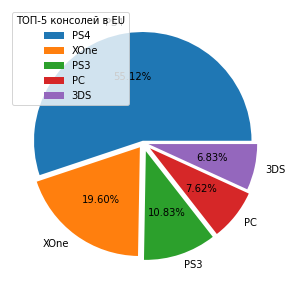

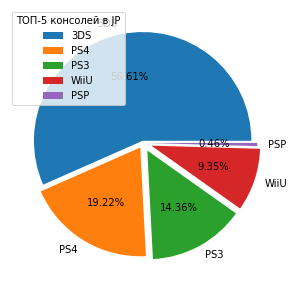

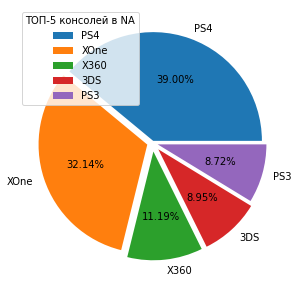

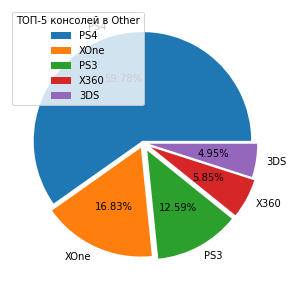

In [50]:
#df_region.columns=['NA','EU', 'JP', 'Other']

for raw in df_region.columns:
    mark = df_region[raw].sort_values(ascending=False).head(5)
    plt.figure(figsize=(5, 5))
    explode = [0.02, 0.05, 0.08, 0.08, 0.05]
    ax = plt.pie(mark, labels=mark.index, explode=explode, autopct='%.2f%%')
    plt.legend(title = f"ТОП-5 консолей в {raw}", loc='upper left')
    plt.show()    
  

Как видно из графиков, самыми популярными консолями по регионам являются:  
- **Европа** - PS4, XOne, PS3, PC, 3DS 
- **Япония** - 3DS, PS4, PS3, WiiU, PSP  
- **Америка** - PS4, XOne, PS3, X360, 3DS  
- **Остальные страны** - PS4, XOne, PS3, X360, 3DS

Xbox One и PS4 - откровенные лидеры по популярности во всех регионах, однаков в Японии лидером является Nintendo 3DS, а в Европе в ТОП-5 платформ еще и PC появились. 

Теперь проведем те же самые операция по жанрам, сначала общий график распределения продаж по жанрам в разных регионах:

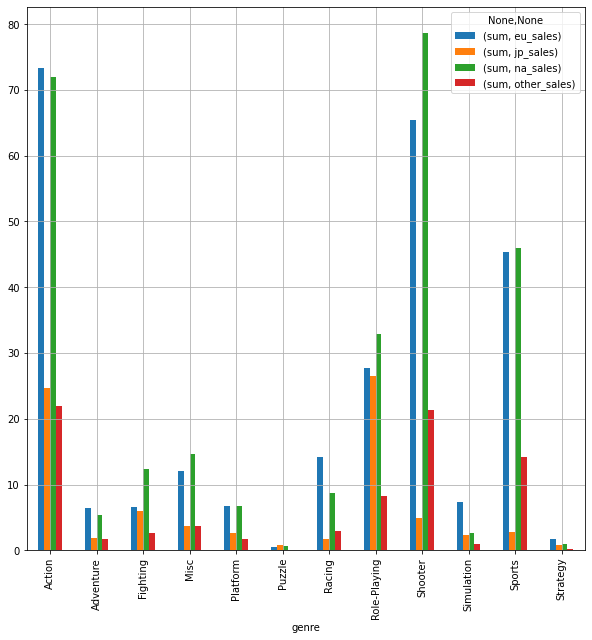

In [51]:
df_genre = df_total.pivot_table(
    index='genre', 
    values=['na_sales','eu_sales', 'jp_sales', 'other_sales'],
    aggfunc=['sum'])
df_genre.plot(grid=True, figsize=(10,10), kind='bar');

In [52]:
print(df_genre)
df_genre.columns=['EU','JP', 'NA', 'Other']
print(df_genre)

                  sum                              
             eu_sales jp_sales na_sales other_sales
genre                                              
Action          73.31    24.68    71.92       21.98
Adventure        6.39     1.82     5.35        1.70
Fighting         6.60     5.91    12.34        2.68
Misc            12.08     3.76    14.61        3.67
Platform         6.70     2.65     6.77        1.78
Puzzle           0.51     0.88     0.65        0.11
Racing          14.12     1.67     8.74        2.89
Role-Playing    27.67    26.47    32.90        8.30
Shooter         65.36     4.86    78.70       21.38
Simulation       7.30     2.27     2.62        0.89
Sports          45.32     2.81    45.96       14.19
Strategy         1.79     0.77     0.98        0.24
                 EU     JP     NA  Other
genre                                   
Action        73.31  24.68  71.92  21.98
Adventure      6.39   1.82   5.35   1.70
Fighting       6.60   5.91  12.34   2.68
Misc          1

А терерь круговые диаграммы с ТОП-5 жанров в различных регионах:

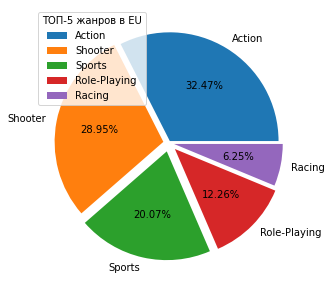

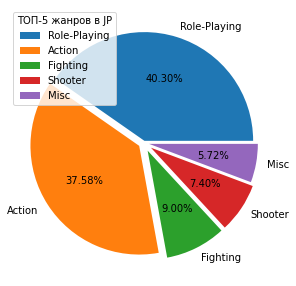

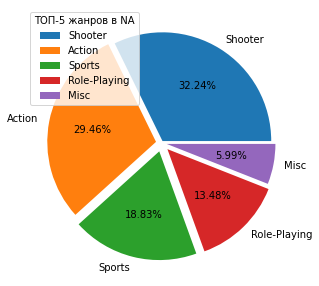

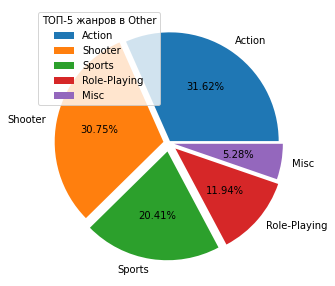

In [53]:

for raw in df_genre.columns:
    mark = df_genre[raw].sort_values(ascending=False).head(5)
    plt.figure(figsize=(5, 5))
    explode = [0.02, 0.05, 0.08, 0.08, 0.05]
    ax = plt.pie(mark, labels=mark.index, explode=explode, autopct='%.2f%%')
    plt.legend(title = f"ТОП-5 жанров в {raw}", loc='upper left')
    plt.show()    


А это наш ТОП-5 жанров по регионам:  
-**Европа** Action, Shooter, Sports, Misc, Role-Playing  
-**Япония** - Role-Playing, Action, Misc, Sports,Platform   
-**Америка** - Action, Shooter, Sports, Misc, Platform  
-**Остальные страны** - Action, Shooter, Sports, Role-Playing, Misc

Экшены и Шутеры являются самыми популярными жанрами игр почти во всех регионах, хоть в  Японии первое место и отдают РПГ, но на втором все же Экшн игры. 

Посмотрим, влияет ли рейтинг ESRB на продажи игр по регионам?


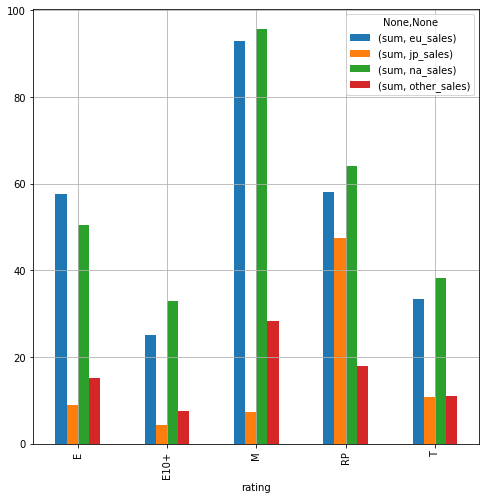

In [54]:
df_rating = df_total.pivot_table(
    index='rating', 
    values=['jp_sales', 'na_sales','eu_sales', 'other_sales'],
    aggfunc=['sum'])
df_rating.plot(grid=True, figsize=(8,8), kind='bar');

In [55]:
print(df_rating)
df_rating.columns=['EU','JP', 'NA', 'Other']
print(df_rating)

            sum                              
       eu_sales jp_sales na_sales other_sales
rating                                       
E         57.66     8.89    50.56       15.23
E10+      25.14     4.18    32.98        7.47
M         92.88     7.21    95.63       28.24
RP        58.07    47.54    64.18       17.98
T         33.40    10.73    38.19       10.89
           EU     JP     NA  Other
rating                            
E       57.66   8.89  50.56  15.23
E10+    25.14   4.18  32.98   7.47
M       92.88   7.21  95.63  28.24
RP      58.07  47.54  64.18  17.98
T       33.40  10.73  38.19  10.89


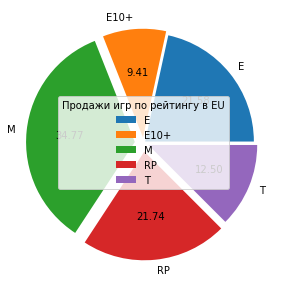

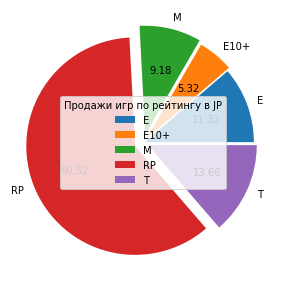

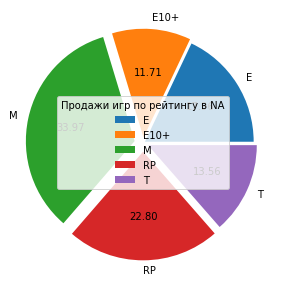

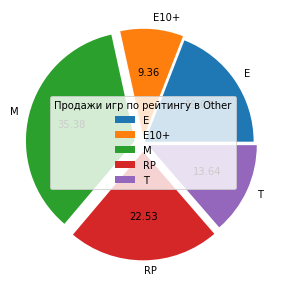

In [56]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 0 else ''
for raw in df_rating.columns:
    mark = df_rating[raw]
    plt.figure(figsize=(5,5))
    explode = [0.02, 0.05, 0.08, 0.08, 0.05]
    ax = plt.pie(mark, labels=mark.index, explode=explode, autopct=my_autopct)
    plt.legend(title = f"Продажи игр по рейтингу в {raw}", loc='center')
    plt.show()    


По получившимся диаграммам можно сделать вывод, что в Америке, Европе и других странах самыми продаваемыми являются игры жанра М, вторым по популярности стал рейтинг Е.  
В Японии же самые продаваемые игры - рейтинг по которым еще не определен, на втором и третьем месте М и Е, как и в остальных регионах. Вероятно, это связано с тем, что в Японии существует своя система рейтинга игр.

## Проверка гипотез

### Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим первую гипотезу. 

Н0 - средние пользовательские рейтинги платформ Хbox one и PC одинаковые

Н1 - средние пользовательские рейтинги платформ Хbox one и PC отличаются

Значение alpha примем равным 0.05

In [57]:
sample_1 = df_total.query('(platform == "XOne")')['user_score']
sample_2 = df_total.query('platform == "PC"')['user_score']
alpha = 0.05

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

p-значение: 0.26246011727057733
Не получилось отвергнуть нулевую гипотезу


Провея ttest мы не смогли отвергнуть нулевую гипотезу, а это значит, что у нас есть основания полагать, что средние пользовательские рейтинги у платформ Xbox One и PC относительно равны

Сделаем  проверку ручным способом:

In [58]:
df_checking_1 = df_total.query('platform == "XOne" or platform == "PC"')
df_checking_1.pivot_table(index='platform',
                          values='user_score',
                         aggfunc='mean')

,user_score
platform,
PC,4.896689
XOne,4.496053


### Гипотеза №2. Средние пользовательские рейтинги жанров Action и Sports разные.

Проверим вторую гипотезу, заданим следующие значения:

Н0 - средние пользовательские рейтинги жанров Action и Sports равны

Н1 - средние пользовательские рейтинги жанров Action и Sports отличаются 

значение aplha примем равное 0.05

In [59]:
sample_3 = df_total.query('genre == "Action"')['user_score']
sample_4 = df_total.query('genre == "Sports"')['user_score']
alpha = 0.05

results = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

p-значение: 0.0007425795991578783
Отвергаем нулевую гипотезу


Сделав ttest мы отвергаем нулевую гипотезу, говоря о том, что вероятнее всего пользовательские рейтинги жанров Action и Sports отличаются, проверим ручным тестом:

In [60]:
df_checking_2 = df_total.query('(genre == "Action") or (genre == "Sports")')
df_checking_2.pivot_table(index='genre',
                       values='user_score',
                       aggfunc='mean')

,user_score
genre,
Action,3.087008
Sports,4.090728


## Вывод

Мы провели большое исследование по пулученным данным о продажах компьютерных игр. 

У нас были вводные данные о продажах игр за 1980-2016 год, проводя свое исследование мы узнали, что пик выпуска игр приходится на 2007-2008 годы, потом заметен спад продаж. 

Самой популярной консолью за все время является PS2, однако мы обнаружили, что на старые консоли игры перестают выпускать спустя 8-10 лет, и в последнее время замечен тренд на PS4, Xbox One, Nintendo WiiU и Nintendo Switch.

В среднем игры на PS4, Xbox One и WiiU продаются по 0.1-0.2 млн копий, при этом у японской WiiU этот показатель выше чем у консолей нового поколения, скорее всего это связано с тем, что консоль появилась на рынке раньше остальных, ведь она относится к консолям предыдущего поколоения.   

На портативной Nintendo 3DS продажи ниже, но она единственная на рынке портативная консоль.

Чаще всего количество продаж больше при более высоких оценках критиков и пользователей на всех 4-х платформах, однако у Xbox One при большом количестве продаж оценки пользователей меньше. 

В нашем исследовании мы выяснили, что  самыми популярными в последнии годы жанрами игр являются шутеры, спортивные и файтинги, игры с самыми маленькими продажами - это приключения и стратегии.  

Xbox One и PS4 - откровенные лидеры по популярности во всех регионах, однако в Японии много людей, кто играет в Nintendo 3DS.

Экшены и Шутеры являются самыми популярными жанрами игр почти во всех регионах, хоть в  Японии первое место и отдают РПГ, но на втором все же Экшн игры. 

В Америке, Европе и других странах самыми продаваемыми являются игры жанра М, вторым по популярности стал рейтинг Е.  
В Японии же самые продаваемые игры - рейтинг по которым еще не определен, на втором и третьем месте М и Е, как и в остальных регионах.  

Мы проверили две гипотезы и можем сделать по ним следующие выводы:
- у нас есть основания полагать, что средние пользовательские рейтинги у платформ Xbox One и PC относительно равны
- пользовательские рейтинги жанров Action и Sports отличаются

Подводя итоги, наши рекомендации для проведения рекламных компаний на 2017 год:

**Компании стоит отдать приоритет по рекламной компани для игр в жанрах Экшн и Шутер, с рейтингами М и Е, выпускаемые на консолях PS4, Xbox One в любом регионе.
Nintendo WiiU тоже пользуется спросом, но это консоль прошлого поколения, поэтому есть все шансы что на нее скоро перестанут выпускать новые игры, тем более, что ходят слухи о том что Nintendo готовятс к релизу консоли нового поколения, которая станет  конкурентом PS4 и Xbox One.  
Отдельного внимания заслуживают игры для Nintendo 3DS, скорее всего можно выделить бюджет на рекламу игр для нее, поскольку сейчас это единственная портативная консоль на рынке видеоигр, у которой, к тому же, так много поклонников в Японии.**